The problem at hand is to develop a machine learning model to predict the progression of diabetes in patients based on certain medical attributes.

This predictive model can be used in the healthcare domain to assist healthcare professionals in assessing the risk and progression of diabetes in patients.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Loading the dataset ##


In [3]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

To see the contents of the "diabetes" dataset that you've loaded, you can print the data stored in diabetes_X (input features) and diabetes_y (target variable)


In [4]:
print("Input Features (diabetes_X):")
print(diabetes_X)

print("\nTarget Variable (diabetes_y):")
print(diabetes_y)

Input Features (diabetes_X):
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]

Target Variable (diabetes_y):
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  

train_test_split function splits a dataset into two parts: one for training and one for testing.
1.It creates four sets: X_train (features for training), X_test (features for testing), y_train (target values for training), and y_test (target values for testing).
2.The test_size parameter determines the size of the testing dataset (e.g., 0.2 for 20% of the data).
3.The random_state parameter ensures that the split is reproducible, so you get the same split each time you run the code.
4.This split is crucial for training and evaluating machine learning models, helping you assess their performance.

In [5]:
# Convert the data to a pandas dataframe
df = pd.DataFrame(diabetes_X, columns=datasets.load_diabetes().feature_names)
df['target'] = diabetes_y

# Get the summary statistics of the data
df.head(9)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0


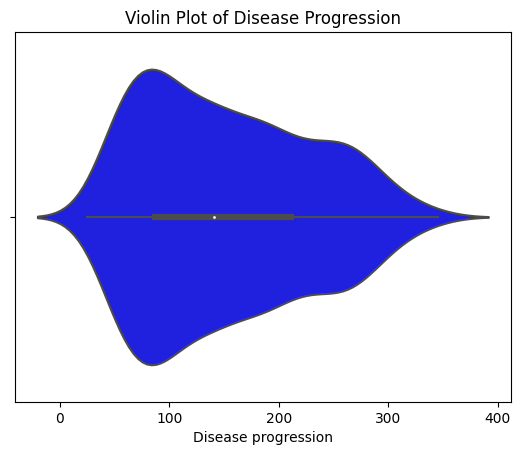

In [6]:

sns.violinplot(x="target", data=df, color="blue")
plt.xlabel("Disease progression")
plt.title("Violin Plot of Disease Progression")
plt.show()

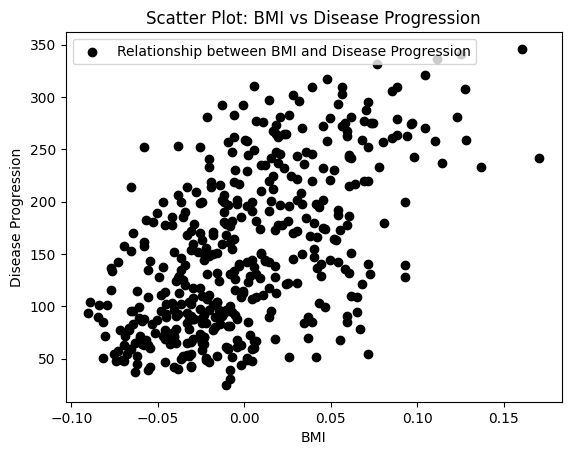

In [7]:
# Create a scatter plot comparing BMI and Disease Progression
scatter_plot = plt.scatter(df["bmi"], df["target"], color="black", marker="o", label="Relationship between BMI and Disease Progression")

# Set the x-axis label to "BMI"
plt.xlabel("BMI")

# Set the y-axis label to "Disease Progression"
plt.ylabel("Disease Progression")

# Set the title of the plot to "Scatter Plot: BMI vs Disease Progression"
plt.title("Scatter Plot: BMI vs Disease Progression")

# Add a legend to the plot
plt.legend()

# Display the scatter plot
plt.show()


"The provided scatter plot visualizes the connection between the BMI (Body Mass Index) attribute and the target variable, which signifies disease progression. This graphical representation distinctly displays a positive linear association between BMI and disease progression. In simpler terms, as BMI values rise, there is a tendency for disease progression values to also increase. This implies that higher BMI values are linked to more significant levels of disease progression."

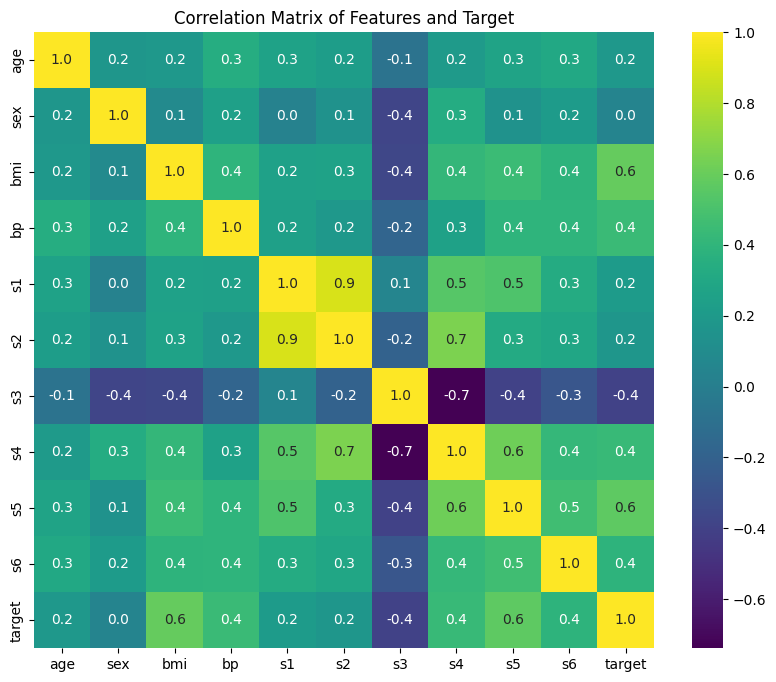

In [8]:
corr_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap = "viridis", annot=True, fmt=".1f")  # The "viridis" color map (colormap) for coloring the cells. It also annotates the cells with the correlation coefficients
plt.title("Correlation Matrix of Features and Target")
plt.show()

Heatmap shows that 0.6 showing that bmi and Target is having positive correlation 

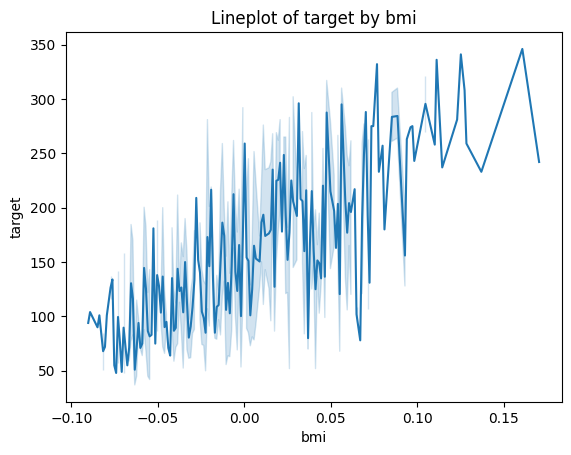

In [10]:

import matplotlib.pyplot as plt

sns.lineplot(data=df, x="bmi", y="target")

# Customize the plot
plt.xlabel("bmi")
plt.ylabel("target")
plt.title("Lineplot of target by bmi")

# Show the plot
plt.show()


"The line plot illustrates the relationship between variables 'bmi' and 'target'. It showcases the variations and trends in 's1' concerning different genders."

The code imports the StandardScaler class from the sklearn.preprocessing module.
It creates a StandardScaler object named scaler.
StandardScaler is used for data standardization or normalization.
Standardization transforms data to have a mean of 0 and a standard deviation of 1.
This process helps ensure consistent feature scales for machine learning models.
The scaler can be fit to training data using scaler.fit(X_train).
It can then be used to transform both training and testing data for consistent scaling.

In [11]:
bmi_iv = df[['bmi']]
disease_progression_dv  = df['target']

The dataset is splitted into train(70%) and test(30%) to train the machine learninng model and to evaluate its performance using the splitted dataset.

In [12]:
bmi_ivtr, bmi_ivte, disease_progression_dvtr, disease_progression_dvte = train_test_split(bmi_iv, disease_progression_dv, test_size=0.3, random_state=42)

In [13]:
# Training the model
model_Lr = LinearRegression()  
model_Lr.fit(bmi_ivtr, disease_progression_dvtr)

LinearRegression()

In [14]:
disease_progression_dvpred = model_Lr.predict(bmi_ivte)

In [15]:
print('Coefficient of the model: \n', model_Lr.coef_)

Coefficient of the model: 
 [981.18293207]


In [16]:
print('intercept of the model:', model_Lr.intercept_)

intercept of the model: 151.1011979244235


In [17]:
from sklearn import metrics

In [18]:
# Calculating the mean squared error
print('Mean squared error for test set: %.2f' % metrics.mean_squared_error(disease_progression_dvte, disease_progression_dvpred))

Mean squared error for test set: 3744.86


In [19]:
# Calculating the mean squared error for the train set
print('Mean squared error for the train set: %.2f' % metrics.mean_squared_error(disease_progression_dvtr, model_Lr.predict(bmi_ivtr)))


Mean squared error for the train set: 3957.91


The Mean Squared Error (MSE) assesses how well our model fits the training data. A lower MSE indicates a superior fit. However, in our case, the model exhibits a high MSE on both the training and test datasets, signifying that it doesn't make predictions very close to the actual values. The MSE quantifies the average of the squared disparities between our predictions and the real values. Smaller MSE values are preferred as they signify a better model fit. Conversely, a high MSE suggests that our model lacks accuracy and has substantial prediction errors. The following code demonstrates the visualization of the model's performance.

<Axes: xlabel='bmi', ylabel='target'>

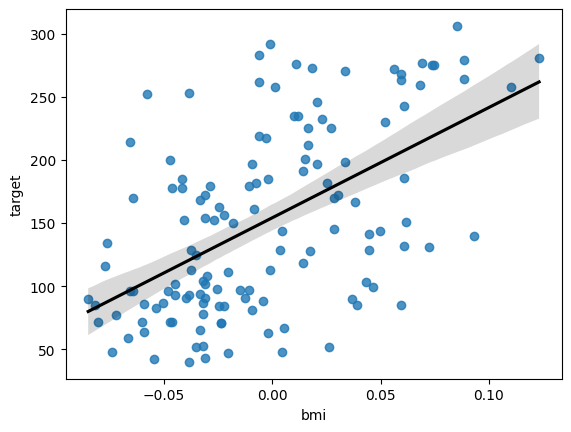

In [24]:

sns.regplot(x = bmi_ivte, y =disease_progression_dvte,
            line_kws = {"color": "black"})


Considering the calculations above, it's evident that my model isn't well-suited for the data. It exhibits a significant prediction error, limited explanatory capability, and a questionable adherence to linear assumptions.